In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print("We have total", len(training_images), "images for training")
print("with", len(training_labels), "labels for each image")

We have total 60000 images for training
with 60000 labels for each image


In [6]:
print("We have taken", len(test_images), "images to test our model")
print("with", len(test_labels), "its labels for each image")

We have taken 10000 images to test our model
with 10000 its labels for each image


In [7]:
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [8]:
training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

### CNN Model consisting of: 2-Convolutional/Hidden layers, 1 flatten and 2 dense layer along with linear, lrelu and softmax AF

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.layers import LeakyReLU

cnn_model = Sequential()

# Convolution layer-1
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear',
                     input_shape=(28, 28, 1), padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D((2, 2), padding='same'))

# Convolution layer-2
cnn_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Flattening the o/p layer
cnn_model.add(Flatten())

# 128 dense layers, and 10 output layers
cnn_model.add(Dense(128, activation='softmax'))
cnn_model.add(Dense(10, activation='softmax'))

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

### Adam Optimizer with sparse categrical crossentropy loss function

In [11]:
cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = cnn_model.fit(training_images, training_labels, batch_size=256, epochs=20, validation_split=.15)

Epoch 1/20
200/200 [==============================] - 47s 235ms/step - loss: 2.0449 - accuracy: 0.4892 - val_loss: 1.9020 - val_accuracy: 0.5579
Epoch 2/20
200/200 [==============================] - 46s 232ms/step - loss: 1.7874 - accuracy: 0.5652 - val_loss: 1.6814 - val_accuracy: 0.5718
Epoch 3/20
200/200 [==============================] - 46s 229ms/step - loss: 1.5876 - accuracy: 0.5751 - val_loss: 1.5046 - val_accuracy: 0.5756
Epoch 4/20
200/200 [==============================] - 47s 233ms/step - loss: 1.4282 - accuracy: 0.5772 - val_loss: 1.3643 - val_accuracy: 0.5770
Epoch 5/20
200/200 [==============================] - 49s 243ms/step - loss: 1.3022 - accuracy: 0.5832 - val_loss: 1.2512 - val_accuracy: 0.5821
Epoch 6/20
200/200 [==============================] - 48s 241ms/step - loss: 1.2022 - accuracy: 0.5860 - val_loss: 1.1700 - val_accuracy: 0.5859
Epoch 7/20
200/200 [==============================] - 50s 251ms/step - loss: 1.1226 - accuracy: 0.5906 - val_loss: 1.1067 - val_ac

In [13]:
score = cnn_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.787544310092926
Test accuracy: 0.6736000180244446


In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

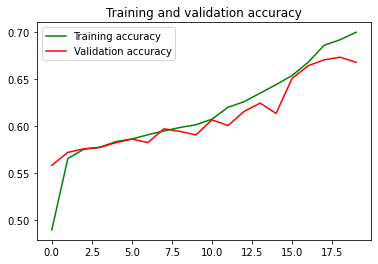

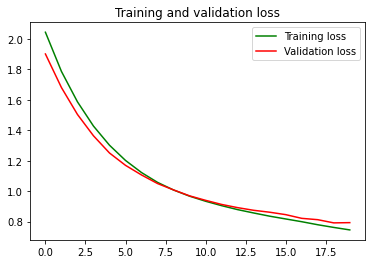

In [15]:
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
predictions = cnn_model.predict(test_images)
print("Predicted Probabilities -\n",predictions[5])
pred_labels = np.argmax(predictions,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_labels[:4])

Predicted Probabilities -
 [0.1832619  0.42402947 0.00198886 0.35670748 0.0021935  0.00300004
 0.01602813 0.00410909 0.00468505 0.00399653]

Predicted Class [Highest Prob] - [9 2 1 1]


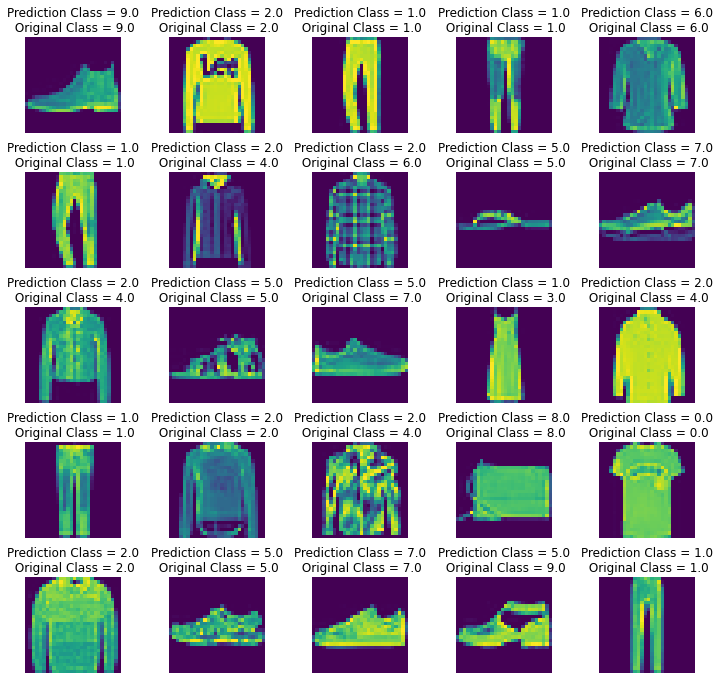

In [17]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

67.36

In [ ]:
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

In [ ]:
def run_test_harness():
    # load dataset
    (training_images, training_labels), (test_images, test_labels) = load_dataset()
    # prepare pixel data
    training_images, test_images = prep_pixels(training_images, test_images)
    # evaluate model
    scores, histories = evaluate_model(training_images, training_labels)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    # define model
    model = define_model()
    # fit model
    model.fit(training_images, training_labels, epochs=10, batch_size=32, verbose=0)
    # save model
    model.save('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [ ]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

def load_dataset():
    # load dataset
    (training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    training_images = training_images.reshape((training_images.shape[0], 28, 28, 1))
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    # one hot encode target values
    training_labels = to_categorical(training_labels)
    test_labels = to_categorical(test_labels)
    return training_images, training_labels, test_images, test_labels

In [ ]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
run_test_harness()